In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [7]:
import pandas as pd

# Load with header row
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dataset = pd.read_csv("diabetes.csv", header=0, names=col_names)

# Remove any rows where column names are present as data
dataset = dataset[dataset['pregnant'] != 'pregnant']

# Convert all columns to numeric (if needed)
for col in col_names:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Now split features and target
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = dataset[feature_cols]
y = dataset['label']

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",m   .accuracy_score(y_test, y_pred)) 

Accuracy: 0.6796536796536796


In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.precision_score(y_test, y_pred)) 

Accuracy: 0.5753424657534246


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[115,  31],
       [ 43,  42]])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.79      0.76       146
           1       0.58      0.49      0.53        85

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231



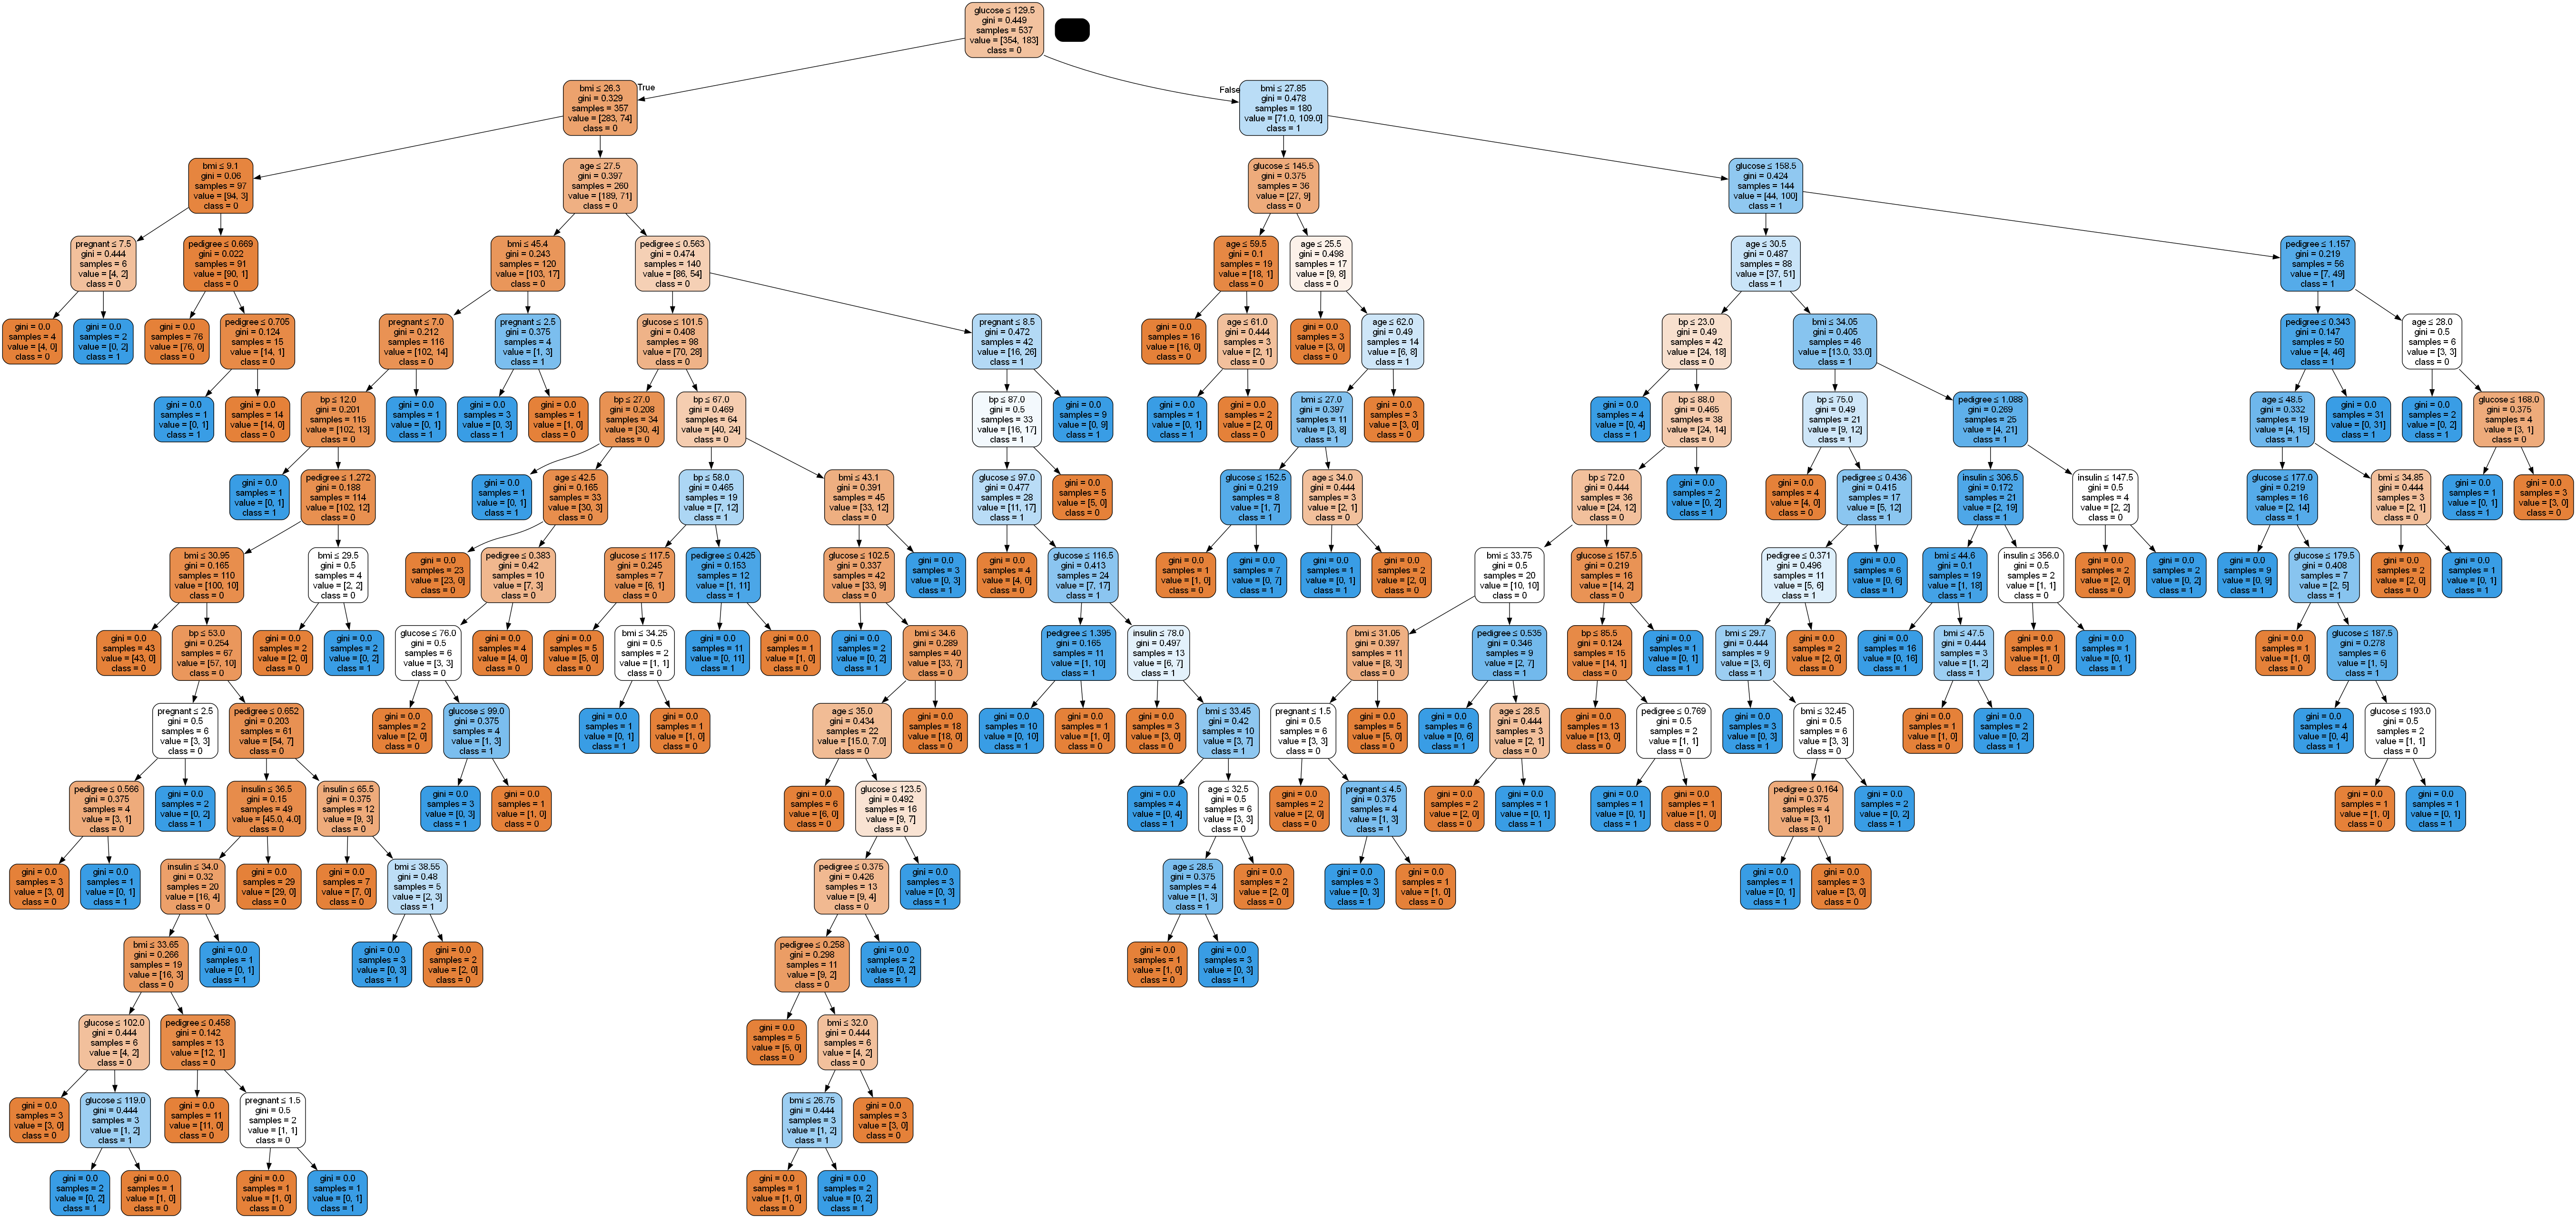

In [14]:
from sklearn.tree import export_graphviz
from io import StringIO  # ✅ use io instead of sklearn.externals.six
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=['0', '1']
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')  # Saves as a PNG
Image(graph.create_png())  # Displays in Jupyter


In [15]:
import graphviz
print(graphviz.__version__)


0.21


In [16]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"  # adjust as needed


In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


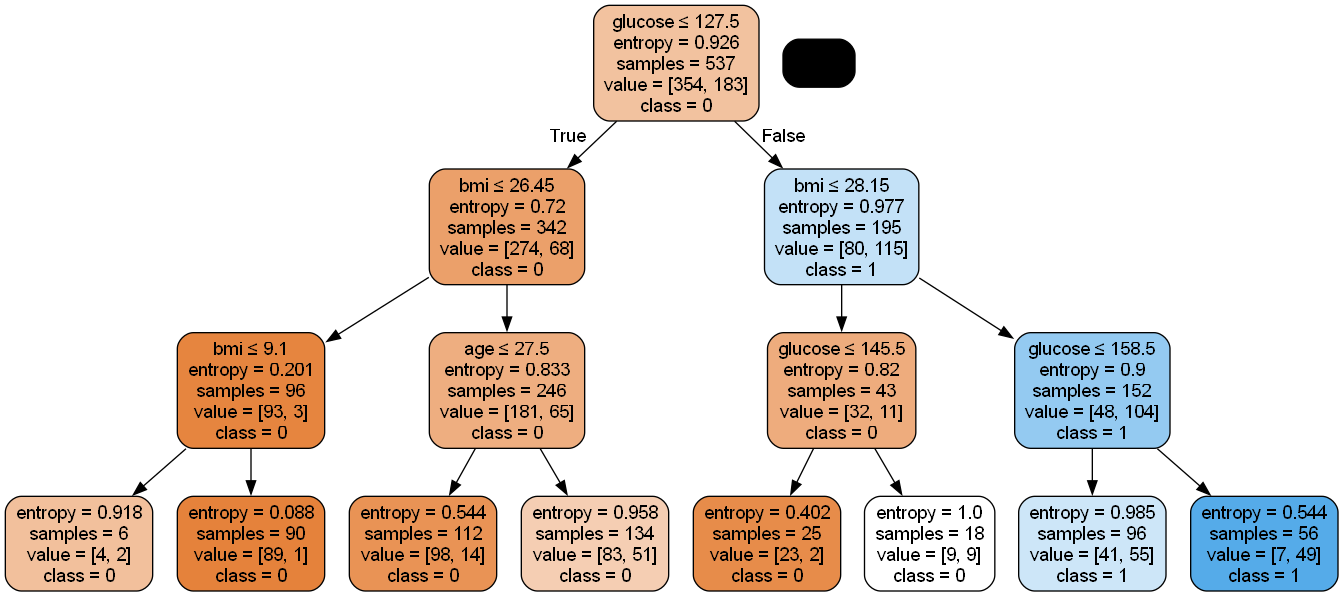

In [18]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(
    clf, out_file=dot_data,
    filled=True, rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=['0', '1']
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(filename='diabetes.png')
